In [1]:
from tensor import visualize, model
from tensorflow.examples.tutorials.mnist import input_data
from svm import load_mnist, svm, predict, accuracy, visualize

In [2]:
# import data
fashion_mnist = input_data.read_data_sets('../data', one_hot=True)

# shapes of training set
print('Training set (images) shape: {shape}'.format(shape=fashion_mnist.train.images.shape))
print('Training set (labels) shape: {shape}'.format(shape=fashion_mnist.train.labels.shape))

# shapes of test set
print('Test set (images) shape: {shape}'.format(shape=fashion_mnist.test.images.shape))
print('Test set (labels) shape: {shape}'.format(shape=fashion_mnist.test.labels.shape))

Extracting ../data\train-images-idx3-ubyte.gz
Extracting ../data\train-labels-idx1-ubyte.gz
Extracting ../data\t10k-images-idx3-ubyte.gz
Extracting ../data\t10k-labels-idx1-ubyte.gz
Training set (images) shape: (55000, 784)
Training set (labels) shape: (55000, 10)
Test set (images) shape: (10000, 784)
Test set (labels) shape: (10000, 10)


In [3]:
# image labels
labels = {
    0: 't-shirt',
    1: 'trouser',
    2: 'pullover',
    3: 'dress',
    4: 'coat',
    5: 'sandal',
    6: 'shirt',
    7: 'sneaker',
    8: 'bag',
    9: 'ankle-boot'
}

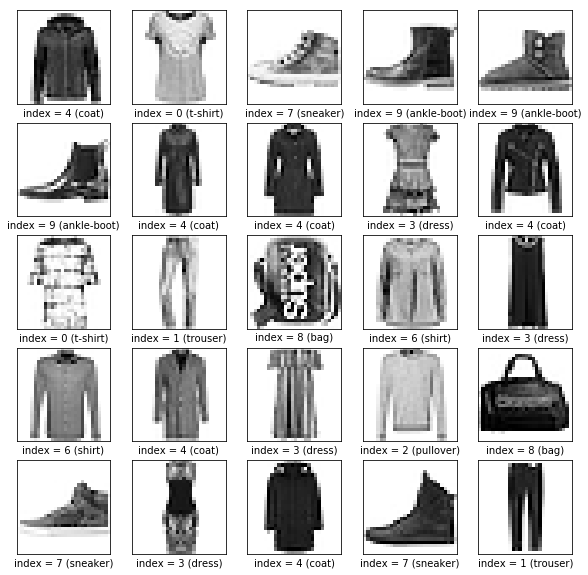

In [4]:
# visualize train sample
visualize(range(25), fashion_mnist, labels)

Cost after epoch 0: 0.5185099385323152
Cost after epoch 1: 0.3758325053333404
Cost after epoch 2: 0.33569685892311424
Cost after epoch 3: 0.3122782416520284
Cost after epoch 4: 0.29171826050327304
Cost after epoch 5: 0.2767576284856209
Cost after epoch 6: 0.26513731478668995
Cost after epoch 7: 0.2533215392517558
Cost after epoch 8: 0.24164136782032658
Cost after epoch 9: 0.23201938101434133
Cost after epoch 10: 0.2233899272924094
Cost after epoch 11: 0.21777674542009237
Cost after epoch 12: 0.20694254666330494
Cost after epoch 13: 0.1989471962560524
Cost after epoch 14: 0.1926938945121794
Cost after epoch 15: 0.18827044686066188


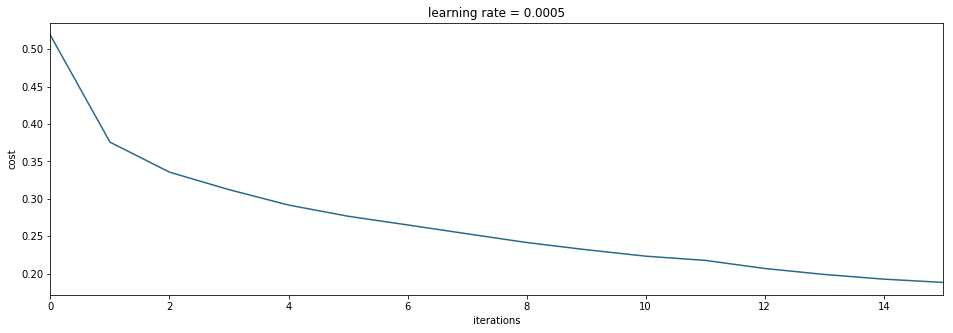

Parameters have been trained!
Train Accuracy: 0.930273
Test Accuracy: 0.8784


In [5]:
# generate neural network
train = fashion_mnist.train
test = fashion_mnist.test

        from tensorflow.examples.tutorials.mnist import input_data
        mnist = input_data.read_data_sets(self.data_dir, one_hot=True)

        self.X_train = mnist.train.images
        self.y_train = mnist.train.labels

        self.X_val = mnist.test.images
        self.y_val = mnist.test.labels

parameters = model(train, test, labels, learning_rate=0.0005)

In [2]:
# load svm data
train = load_mnist('../data/')
test = load_mnist('../data/', kind='t10k')

# shapes of training set
print('Training set (images) shape: {shape}'.format(shape=train[0].shape))
print('Training set (labels) shape: {shape}'.format(shape=train[1].shape))

# shapes of test set
print('Test set (images) shape: {shape}'.format(shape=test[0].shape))
print('Test set (labels) shape: {shape}'.format(shape=test[1].shape))

In [ ]:
# train + predict with svm
model = svm(train)
prediction = predict(model, test)

# determine accuracy
predicted_labels = accuracy(model, test, prediction)
visualize(labels, test, predicted_labels)